In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [32]:
img = cv2.imread('images/id_clean.jpeg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [33]:
def show_image(img):
    plt.figure(figsize=(15, 10))
    plt.imshow(img)

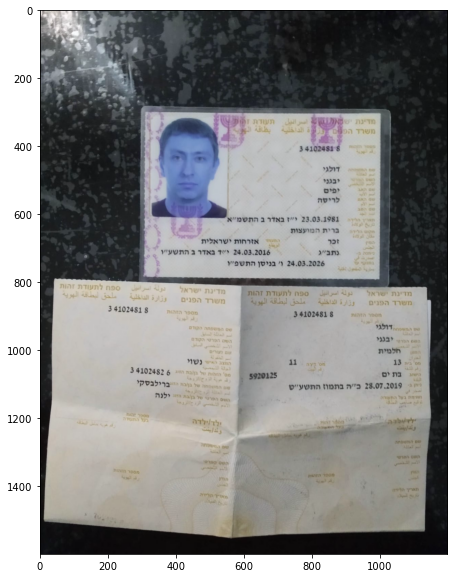

In [34]:
show_image(img)

In [35]:
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

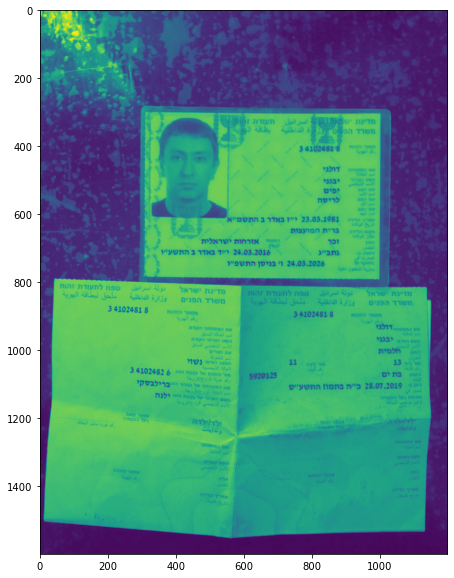

In [36]:
show_image(get_gray(img))

In [41]:
def get_threshholded(img, minVal, maxVal):
    ret, img = cv2.threshold(img, minVal, maxVal, cv2.THRESH_BINARY)
    return img

In [42]:
img_gray = get_gray(img)

In [43]:
img_thresh = get_threshholded(img_gray, 200, 255)

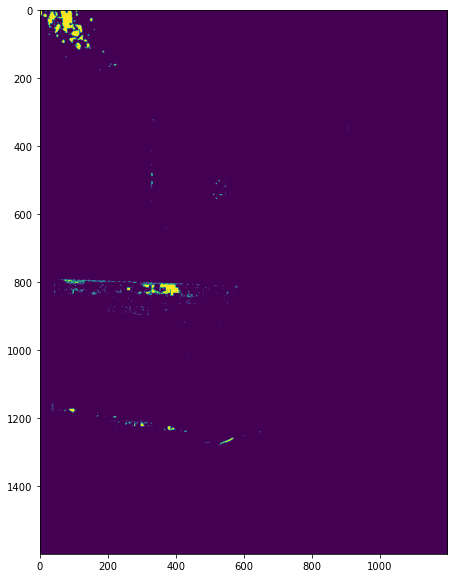

In [44]:
show_image(img_thresh)

In [49]:
def get_adaptiv_threshholded_mean(img, maxVal):
    img = cv2.adaptiveThreshold(img, maxVal, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
    return img

In [50]:
img_ada_mean = get_adaptiv_threshholded_mean(img_gray, 255)

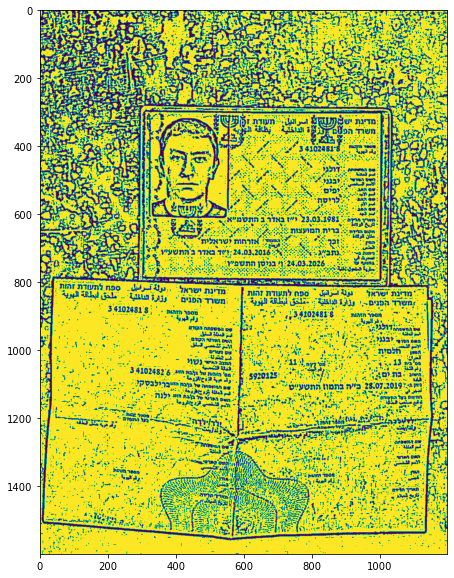

In [51]:
show_image(img_ada_mean)

In [52]:
def get_adaptiv_threshholded_gausian(img, maxVal):
    img = cv2.adaptiveThreshold(img, maxVal, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
    return img

In [53]:
img_ada_gaussian = get_adaptiv_threshholded_gausian(img_gray, 255)

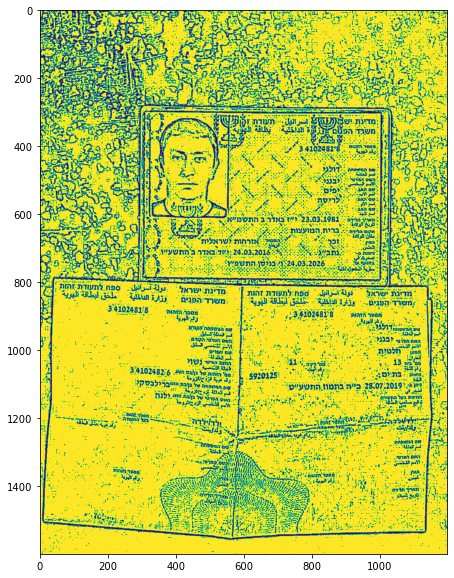

In [54]:
show_image(img_ada_gaussian)

In [55]:
def get_otsu_binaty(img, minVal, maxVal):
    ret, img = cv2.threshold(img, minVal, maxVal, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img

In [56]:
img_otsu = get_otsu_binaty(img_gray, 0, 255)

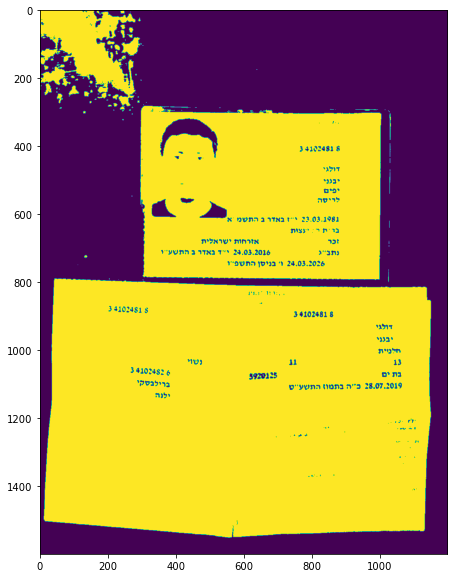

In [57]:
show_image(img_otsu)

In [58]:
def get_gaussian_blured(img):
    return cv2.GaussianBlur(img, (5,5), 0)

In [59]:
img_blured = get_gaussian_blured(img_gray)

In [62]:
img_blured = get_adaptiv_threshholded_gausian(img_blured, 255)

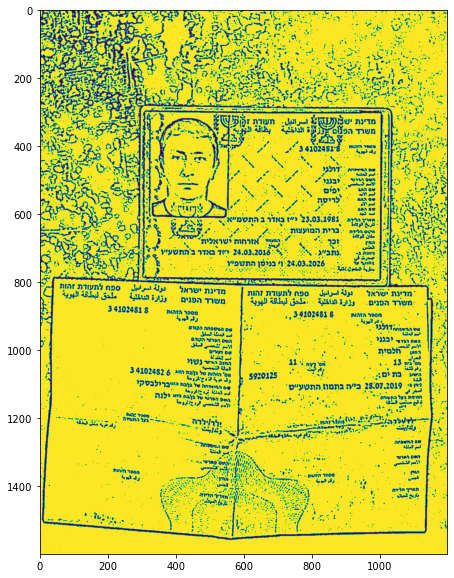

In [63]:
show_image(img_blured)

# Histogram to calculation right threshold value

In [64]:
import numpy as np

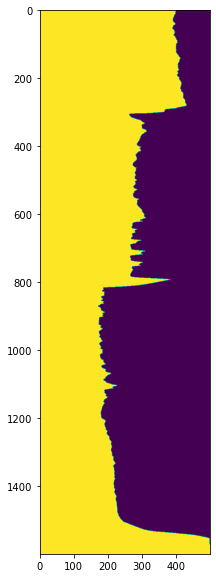

In [69]:
im = cv2.imread('images/id_clean.jpeg', cv2.IMREAD_GRAYSCALE)

#invert image
im = 255 - im

# calculate horizontal projection
proj = np.sum(im, 1)

#Create image of same width
m = np.max(proj)
w = 500

result = np.zeros((proj.shape[0], w))

# draw a line for each row

for row in range(im.shape[0]):
    cv2.line(result, (0, row), (int(proj[row] *w/m), row), (255, 255, 255), 1)


show_image(result)



In [76]:
resized = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)

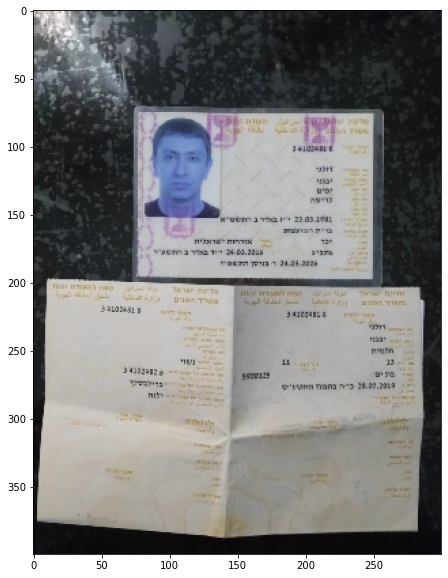

In [77]:
show_image(resized)

In [78]:
img.shape

(1600, 1200, 3)

In [79]:
resized.shape

(400, 300, 3)

# Noise removal

# Segmenatation

In [93]:
image = get_gray(resized)
image = cv2.medianBlur(image, 5)
image = get_adaptiv_threshholded_gausian(image, 255)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

kernel = np.ones((5,100), np.uint8)
# image = cv2.dilate(image, kernel, iterations=3)
image = cv2.erode(image, None, iterations=2 )

# Find the contours
contours,hierarchy = cv2.findContours(resized,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(resized,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('images/id_clean.jpeg')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
kernel = np.ones((5,100), np.uint8)
thresh = cv2.dilate(thresh,kernel,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('Line')

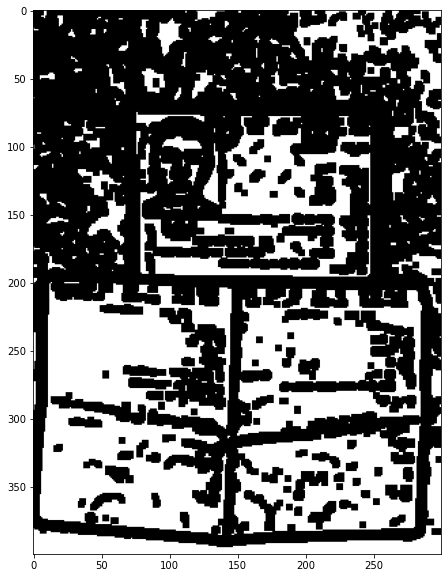

In [91]:
show_image(image)